(nm_iterative_methods_matrix)=
# Iterative methods to solve a matrix
[<!-- module-nm badge --><span class="module module-nm">Numerical Methods</span>](module-nm) 
```{index} Iterative methods to solve a matrix
```

Two types/families of methods exist to solve matrix systems. These are termed **direct** methods and **iterative** (or **indirect**) methods.

Direct methods perform operations on the linear equations (the matrix system), e.g. the substitution of one equation (e.g. Gaussian elimination). This transformed the equations making up the linear system into equivalent ones with the aim of eliminating unknowns from some of the equations and hence allowing for easy solution through back (or forward) substitution.

[Cramer's rule](https://en.wikipedia.org/wiki/Cramer%27s_rule) gives an explicit formula for the inverse of a matrix, or for the solution of a linear matrix system. The computational cost of this method (in terms of arithmetic operations required; also termed complexity) scales with $(n+1)!$, whereas the Gaussian elimination method (which is basically the substitution method) scales with $n^3$. For large $n$ Gaussian elimination will clearly be more efficient. $n$ here refers to the number of unknowns or equations, or sometimes termed the degrees of freedom of the problem.

An advantage of direct methods is that they provide the exact solution (assuming exact arithmetic, i.e. ignoring the round off related issues) in a finite number of operations. However, as pointed out previously, $n$ could be billions for hard-core applications such as in numerical weather forecasting. In this case the $n^3$ operations required of a direct algorithm such as Gaussian elimination is completely prohibitive. In an attempt to further reduce this cost **iterative algorithms** were devised.

These algorithms start with an initial guess at the solution ($\pmb{x}_0$), and iteratively improve this producing a series of approximate answers $\pmb{x}_k$. For the exact answer to the matrix system $A\pmb{x} = \pmb{b}$, we know that the residual vector $\pmb{r} = A\pmb{x}-\pmb{b}$ is zero. For our iterative procedure, we can use the norm of the residual vector $\pmb{r}_k = A\pmb{x}_k-\pmb{b}$ based on the approximate solution $\pmb{x}_k$, as a measure of how close we are to solving the equation (the norm $||\pmb{r}_k||$ expresses this as a single number). As we iterate further, we hope to drive down this number and we may stop the iterations at some small (non-zero) residual norm tolerance level. The final iteration gives us an answer $\pmb{x}_k$ which is still an approximation to the solution and not the exact solution we would obtain with direct methods. The residual norm tolerance stopping criteria therefore needs to be thought about carefully, e.g. depending on how accurate a solution $\pmb{x}$ we require.

Since well through iterative methods, $\pmb{x}_k$ is still very much an approximation rather than an exact answer, you could imagine why weather forecasting, which uses iterative methods, is still very much an approximation rather than an exact answer. However, our current exact methods are prohibitively expensive in terms of time taken, so iterative method is the best we have. You could imagine why weather forecasting is very strict on time. For large agricultural farms which use remote sensing for weather monitoring and forecast, it would be useless to tell them the exact solution to a storm a long time after the storm has passed and devastated the crop production because you tried to solve the equations involved exactly, and from the time the storm was on the horizon it took you such a long time to find the exact solution, assuming that such an exact solution even exist in the 1st place. Our most powerful supercomputers are needed for weather forecasting even if we used iterative methods.

We have already considered Gaussian elimination (and back substitution) as examples of direct solution methods. We'll consider an example of an iterative method now.

## Jacobi's method
```{index} Jacobi's method
```

Consider a matrix system

$$A\pmb{x}=\pmb{b} \quad \iff \quad \sum_{j=1}^nA_{ij}x_j=b_i,\quad \textrm{for}\quad i=1,2,\ldots, n.$$

Let's rewrite this by pulling out the term involving $x_i$ (i.e. for each row $i$ pull out the diagonal from the summation):

$$A_{ii}x_i + \sum_{\substack{j=1\\ j\ne i}}^nA_{ij}x_j=b_i,\quad  i=1,2,\ldots, n.$$

We can then come up with a formula for our unknown $x_i$:

$$x_i = \frac{1}{A_{ii}}\left(b_i- \sum_{\substack{j=1\\ j\ne i}}^nA_{ij}x_j\right),\quad  i=1,2,\ldots, n.$$

For each individual $x_i$, all the other components of $\pmb{x}$ appearing on the RHS are also unknown and so this is an example of an implicit formula which doesn't help us directly, but does suggest the following iterative scheme:

* starting from a guess at the solution $\pmb{x}^{(0)}$

* iterate for $k>0$

    $$x_i^{(k)} = \frac{1}{A_{ii}}\left(b_i- \sum_{\substack{j=1\\ j\ne i}}^nA_{ij}x_j^{(k-1)}\right),\quad  i=1,2,\ldots, n.$$

For this iteration, for a fixed $k$, it does not matter in which order we perform the operations over $i$ as the right hand side only contains the entries of $\pmb{x}$ at the previous iteration.

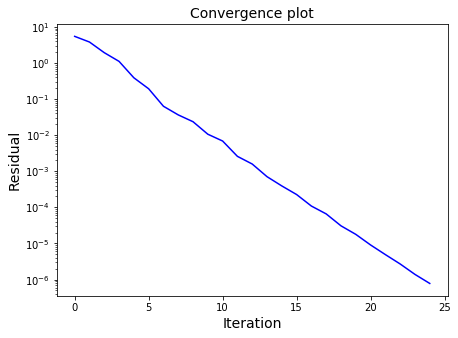

Our solution = [-0.16340811 -0.01532703  0.27335262  0.36893551]
SciPy solution = [-0.16340816 -0.01532706  0.27335264  0.36893555]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl

A = np.array([[10., 2., 3., 5.],
              [1., 14., 6., 2.],
              [-1., 4., 16., -4],
              [5. ,4. ,3. ,11. ]])
b = np.array([1., 2., 3., 4.])

# An initial guess at the solution
# just a vector of zeros of length the number of rows in A
x = np.zeros(A.shape[0]) 

# Iteration tolerance
tol = 1.e-6

# Upper limit on iterations if we don't hit tolerance
it_max = 1000

# Store residuals
residuals=[]

for it in range(it_max):
    
    # Initialise the new solution vector
    x_new = np.zeros(A.shape[0])  
    
    for i in range(A.shape[0]):
        x_new[i] = (1./A[i, i]) * (b[i] - np.dot(A[i, :i], x[:i]) 
                                   - np.dot(A[i, i + 1:], x[i + 1:]))

    # Calculate the norm of the residual r=Ax-b for this latest guess
    residual = sl.norm(A @ x - b) 
    
    # Store it for later plotting
    residuals.append(residual)
    
    # If less than our required tolerance
    # jump out of the iteration and end.
    if (residual < tol):
        break

    x = x_new # update old solution

# Plot the log of the residual
# against iteration number 
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

# Plot the log of the residual
# against iteration number 
ax1.semilogy(residuals, color="blue")
ax1.set_xlabel('Iteration', fontsize=14)
ax1.set_ylabel('Residual', fontsize=14)
ax1.set_title('Convergence plot', fontsize=14)
plt.show()

print("Our solution =", x_new)
print("SciPy solution =", sl.inv(A) @ b)

## Gauss-Seidel's method
```{index} Gauss-Seidel's method
```
We can make a small improvement to Jacobi's method using the updated components of the solution vector as soon as they become available:

* starting from a guess at the solution $\pmb{x}^{(0)}$

* iterate for $k>0$

    $$x_i^{(k)} = \frac{1}{A_{ii}}\left(b_i- \sum_{\substack{j=1\\ j< i}}^nA_{ij}x_j^{(k)} - \sum_{\substack{j=1\\ j> i}}^nA_{ij}x_j^{(k-1)}\right),\quad  i=1,2,\ldots, n.$$

As opposed to Jacobi, we can overwrite the entries of $\pmb{x}$ as they are updated, with Jacobi we need to store both the new as well as the old iteration (i.e. not overwrite the old entries until we have finished with them - which was not until the end of every iteration).

As we are using updated knowledge immediately, the [Gauss-Seidel algorithm](https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method) should converge faster than Jacobi, but note that this convergence can only be guaranteed for matrices which are diagonally dominant (for every row, the magnitude of value on the main diagonal is greater than the sum of the magnitudes of all the other entries in that row), or if the matrix is symmetric positive definite.

We will generelise the Jacobi code to solve the matrix problem using Gauss-Seidel's method:

In [13]:
def gauss_seidel(A, b, maxit=500, tol=1.e-6):
    m, n = A.shape
    x = np.zeros(A.shape[0])
    residuals = []
    for k in range(maxit):
        for i in range(m):
            x[i] = (1./A[i, i]) * (b[i] - np.dot(A[i,:i], x[:i]) 
                                   - np.dot(A[i,i+1:], x[i+1:])) 
        residual = sl.norm(A@x - b)
        residuals.append(residual)
        if (residual < tol): break
        
    return x, residuals

def jacobi(A, b, maxit=500, tol=1.e-6):
    m, n = A.shape
    x = np.zeros(A.shape[0])
    residuals = []
    for k in range(maxit):
        x_new = np.zeros(A.shape[0])
        for i in range(m):
            x_new[i] = (1./A[i, i]) * (b[i] - np.dot(A[i, :i], x[:i]) 
                                   - np.dot(A[i, i + 1:], x[i + 1:]))
        x = x_new # update old solution 
        residual = sl.norm(A@x - b)
        residuals.append(residual)
        if (residual < tol): break       
    return x, residuals

Check the algorithm:

In [15]:
A = np.array([[10., 2., 3., 5.],
                 [1., 14., 6., 2.],
                 [-1., 4., 16.,-4],
                 [5. ,4. ,3. ,11.]])
b = np.array([1., 2., 3., 4.])

# Check gauss_seidel solution
# agrees with multiplying through by the inverse matrix
print("Is our algorithm working?", np.allclose(sl.inv(A)@b, gauss_seidel(A, b)[0]))

Is our algorithm working? True


Now, we can plot convergence for both methods:

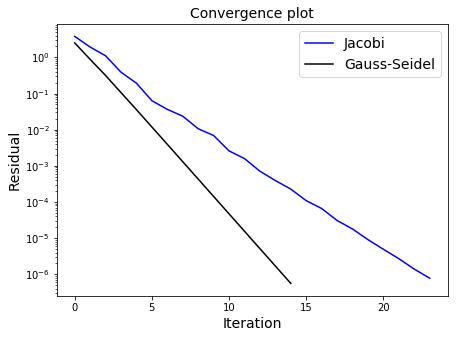

In [22]:
A = np.array([[10., 2., 3., 5.],
                 [1., 14., 6., 2.],
                 [-1., 4., 16.,-4],
                 [5. ,4. ,3. ,11.]])
b = np.array([1., 2., 3., 4.])

# an initial guess at the solution
# here just a vector of zeros of length the number of rows in A
x = np.zeros(A.shape[0]) 

tol = 1.e-6 # iteration tolerance
it_max = 1000 # upper limit on iterations if we don't hit tolerance

x_j, res_j = jacobi(A,b)
x_gs, res_gs = gauss_seidel(A,b)

# Plot the log of the residual against iteration number 
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

# Plot the log of the residual against iteration number 
ax1.semilogy(res_j,'b',label='Jacobi')
ax1.semilogy(res_gs,'k',label='Gauss-Seidel')
ax1.set_xlabel('Iteration', fontsize=14)
ax1.set_ylabel('Residual', fontsize=14)
ax1.set_title('Convergence plot', fontsize=14)
ax1.legend(loc='best', fontsize=14)
plt.show()

(nm_sparse_matrices)=
## Sparse matrices
```{index} Sparse matrices
```
Matrices which result from the numerical solution of differential equations are generally [**sparse**](https://en.wikipedia.org/wiki/Sparse_matrix) which means that most entries are zero (the alternative is termed **dense**).  Knowing which entries are zero means that we can devise more efficient matrix storage methods, as well as more efficient implementations of the above algorithms (e.g. by not bothering to do operations that we know involve multiplications by zero - we know the answer will be zero).

As an example, for the two iterative methods shown above (Jacobi and Gauss-Seidel), the cost of each iteration is quadratically dependent on the number of unknowns $n$, since we need to loop through all the entries of the $n\times n$ matrix $A$. For a fixed number of iterations the computational cost of these methods therefore scales as $n^2$. If we know that each row only contains a fixed, small number of non-zero entries however, we can simply skip the zero entries and the cost per iteration becomes linear in $n$. These scalings of $n^2$ for dense and $n$ for sparse matrices for the cost per iteration are typical for iterative methods. Unfortunately this does not mean that the overall cost of an iterative method is also $n^2$ or $n$, as the number of iterations that is needed to achieve a certain accuracy quite often also increases for larger problem sizes. The number of required iterations typically only increases very slowly however, so that the cost of the method is still considerably cheaper than direct methods, in particular for very large problems.

A huge range of iterative solution methods exist and the literature on this topic is massive. Below is an example of using SciPy to access the [conjugate gradient algorithm](https://en.wikipedia.org/wiki/Conjugate_gradient_method) which is a popular example of a method suitable for matrices which result from the numerical solution of differential equations.

In [23]:
import scipy.sparse.linalg

n = 50

# Just a vector of ones
main_diag = np.ones(n)

# To make it a bit more interesting
# make the off-diagonals random
off_diag = np.random.random(n-1)
A = np.diag(-2*main_diag,0) + np.diag(1.*off_diag,1) + np.diag(1.*off_diag,-1)
# A random RHS vector
b = np.random.random(A.shape[0])

# Print our A in "dense" matrix format
print(A)

# The same matrix in a "sparse" matrix
# data structure where only non-zeros stored
sA = scipy.sparse.csr_matrix(A)
print('This is the same matrix but now stored in a sparse matrix data structure.')
print(sA)

# Now use a scipy iterative algorithm (Conjugate Gradient) to solve
# First define a (callback) function which we are allowed to pass to the solver
# here this is coded such that it will store and print the iteration numbers
# and residuals - basically a method to output some diagnostic
# information on the solver as it executes
def gen_callback_cg():
    diagnostics = dict(it=0, residuals=[]) 
    def callback(xk):   # xk is the solution computed by CG at each iteration
        diagnostics["it"] += 1
        diagnostics["residuals"].append(sl.norm(A @ xk - b))
        print(diagnostics["it"], sl.norm(A @ xk - b))
    return callback    

print('Execute the CG algorithm with:')
x_sol = scipy.sparse.linalg.cg(A,b,x0=None, tol=1e-10, maxiter=1000, callback=gen_callback_cg())

[[-2.          0.63693799  0.         ...  0.          0.
   0.        ]
 [ 0.63693799 -2.          0.54560525 ...  0.          0.
   0.        ]
 [ 0.          0.54560525 -2.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -2.          0.56842649
   0.        ]
 [ 0.          0.          0.         ...  0.56842649 -2.
   0.53907618]
 [ 0.          0.          0.         ...  0.          0.53907618
  -2.        ]]
This is the same matrix but now stored in a sparse matrix data structure.
  (0, 0)	-2.0
  (0, 1)	0.6369379874213537
  (1, 0)	0.6369379874213537
  (1, 1)	-2.0
  (1, 2)	0.5456052511306624
  (2, 1)	0.5456052511306624
  (2, 2)	-2.0
  (2, 3)	0.970464569174672
  (3, 2)	0.970464569174672
  (3, 3)	-2.0
  (3, 4)	0.35765701903000946
  (4, 3)	0.35765701903000946
  (4, 4)	-2.0
  (4, 5)	0.07860832073703727
  (5, 4)	0.07860832073703727
  (5, 5)	-2.0
  (5, 6)	0.3857377666372107
  (6, 5)	0.3857377666372107
  (6, 6)	-2.0
  (6, 7)	0.01413073345489535
 

### Example

Let us consider an electric circuit arranged in a regular grid of $n$ rows and $m$ columns. The nodes in the grid are numbered from 0 to $nm-1$ as indicated in the diagram below.

```{figure} images_nm1/circuit.png
:width: 300px
```
We want to calculate the electric potential $V_i$ in all of the nodes $i$. A node $i$ somewhere in the middle of the circuit is connected via resistor to nodes $i-1$ and $i+1$ to the left and right respectively, and to the nodes $i-m$ and $i+m$ in the rows above and below. For simplicity we assume that all resistors have the same resistance value $R$. The first and last node of the circuit (0 and $nm-1$) to a battery via two additional resistors, with the same resistance value $R$.

The sum of the currents coming into a node is zero (if we use a sign convention where a current coming into a node is positive and a current going out is negative. The currents between two nodes can be calculated using Ohm's law: $I=V/R$ where $R$ is the resistance of the resistor, and $V$ is the potential difference between two nodes, say $V=V_i-V_{i-1}$. Therefore we can write:

$$
\begin{eqnarray}
  0 &=& I_{i-1\to i} + I_{i+1\to i} + I_{i-m\to i} + I_{i+m\to i} \\
    &=& V_{i-1\to i}/R + V_{i+1\to i}/R + V_{i-m\to i}/R + V_{i+m\to i}/R \\
    &=& (V_{i}-V_{i-1})/R + (V_{i}-V_{i+1})/R + (V_{i}-V_{i-m})/R + (V_{i}-V_{i+m})/R \\
    &=& (4V_{i}-V_{i-1}-V_{i+1}-V_{i-m}-V_{i+m})/R
\end{eqnarray}
$$

This gives us one linear equation for each node in the circuit (with slight modifications for nodes that are not in the interior). These can be combined into a linear system $Ax=b$  which is assembled in the code below:

In [25]:
n = 4             # Number of rows
m = 3             # Mumber of columns
V_battery = 5.0   # Voltage on the right of the battery

A = np.zeros((n*m, n*m))
for row in range(n):
    for column in range(m):
        i = row*m + column   # Node number
        if column>0:         # Left neighbour
            A[i,i-1] += -1.0
            A[i,i] += 1.0
        if column<m-1:       # Right neighbour
            A[i,i+1] += -1.0
            A[i,i] += 1.0
        if row>0:            # Neighbour above
            A[i,i-m] += -1.0
            A[i,i] += 1.0
        if row<n-1:          # Neighbour below
            A[i,i+m] += -1.0
            A[i,i] += 1.0

# Connecting node 0 to the battery: 
# I = (V_0 - 0)/R
A[0,0] += 1.0 

# Connecting last node nm-1 to the battery:
# I = (V_0 - V_battery)/R = V_0/R - V_battery/R
A[n*m-1,n*m-1] += 1.0

# The V_battery/R term is a constant that
# does not depend on the unknowns, so ends up in the rhs vector b
b = np.zeros(n*m)
b[n*m-1] = V_battery
print(A)

[[ 3. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  3. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  3. -1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  4. -1.  0. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  3.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  3. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  4. -1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  3.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  3. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  3.]]
